# Term Frequency, K-Means, Feature Selection, Information Gain

## Term Frequency (TF)
TF(Term Frequency) : Istilah frekuensi kata dalam dokumen. Ada beberapa cara untuk menghitung frekuensi ini, dengan cara yang paling sederhana adalah dengan menghitung jumlah kata yang muncul dalam dokumen. Lalu, ada cara untuk menyesuaikan frekuensi, berdasarkan panjang dokumen, atau dengan frekuensi mentah kata yang paling sering muncul dalam dokumen.

In [6]:
!pip install pandas


[notice] A new release of pip available: 22.2.2 -> 22.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [7]:
import pandas as pd
import numpy as np

In [8]:
from sklearn.feature_extraction.text import TfidfTransformer, TfidfVectorizer, CountVectorizer
#Membuat Dataframe
data = pd.read_csv('preprocessing.csv')
vectorizer = CountVectorizer(min_df=1)
bag = vectorizer.fit_transform(data['tweet'])
data

,Unnamed: 0,tweet,label
0,0,"['penandatanganan', 'nota', 'paham', 'janji', ...",pro
1,1,"['desa', 'bina', 'bas', 'potensi', 'lokal', 's...",pro
2,2,"['download', 'logo', 'universitas', 'trunojoyo...",pro
3,3,"['unit', 'giat', 'mahasiswa', 'universitas', '...",pro
4,4,"['kongres', 'ikat', 'alumni', 'fakultas', 'huk...",pro
5,5,"['ukm', 'padu', 'suara', 'golden', 'universita...",pro
6,6,"['bedah', 'buku', 'biografi', 'syaichona', 'mo...",pro
7,7,"['universitas', 'trunojoyo', 'madura']",pro
8,8,"['anggota', 'kelompok', 'mohammad', 'afrizal',...",pro
9,9,"['anggota', 'kelompok', 'mohammad', 'afrizal',...",pro


In [19]:
matrik_vsm=bag.toarray()
#print(matrik_vsm)
matrik_vsm.shape

(18, 162)

In [20]:
matrik_vsm[0]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 0, 0, 0, 0, 0, 0, 0, 2,
       0, 0, 0, 0, 0, 0, 0, 0])

In [21]:
a=vectorizer.get_feature_names()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [22]:
print(len(matrik_vsm[:,1]))
#dfb =pd.DataFrame(data=matrik_vsm,index=df,columns=[a])
dataTF =pd.DataFrame(data=matrik_vsm,index=list(range(1, len(matrik_vsm[:,1])+1, )),columns=[a])
dataTF

18


,abdussalam,ada,adil,afrizal,aja,albani,alumni,amat,andrino,anggota,...,unit,universitas,utm,vector,wakil,wb,were,wibi,wr,wujud
1,0,0,0,0,0,0,0,0,0,0,...,0,2,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,1,0,1,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0,...,1,1,0,0,0,0,1,0,0,0
5,0,0,0,0,0,0,2,0,0,0,...,0,2,1,0,0,0,0,0,0,1
6,0,0,0,0,0,0,0,0,0,0,...,1,1,0,0,0,1,0,0,1,0
7,0,0,0,0,0,0,0,0,0,0,...,0,2,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
9,0,0,0,1,0,1,0,0,0,1,...,0,1,0,0,0,0,0,0,0,0
10,0,0,0,1,0,1,0,0,0,1,...,0,1,0,0,0,0,0,0,0,0


## K-Means
K-Means Clustering adalah suatu metode penganalisaan data atau metode Data Mining yang melakukan proses pemodelan unssupervised learning dan menggunakan metode yang mengelompokan data berbagai partisi.

K Means Clustering memiliki objective yaitu meminimalisasi object function yang telah di atur pada proses clasterisasi. Dengan cara minimalisasi variasi antar 1 cluster dengan maksimalisasi variasi dengan data di cluster lainnya.

In [23]:
from sklearn.cluster import KMeans

kmeans =KMeans(n_clusters=3)
kmeans=kmeans.fit(dataTF)
prediksi=kmeans.predict(dataTF)
centroids = kmeans.cluster_centers_

data=pd.DataFrame(prediksi,columns=["Cluster"])
data

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


,Cluster
0,1
1,1
2,1
3,1
4,1
5,0
6,1
7,1
8,2
9,2


In [24]:
datalabel = pd.read_csv("utm.csv")
datalabel = pd.concat([dataTF.reset_index(drop=True), datalabel["label"]], axis=1)
datalabel

,"(abdussalam,)","(ada,)","(adil,)","(afrizal,)","(aja,)","(albani,)","(alumni,)","(amat,)","(andrino,)","(anggota,)",...,"(universitas,)","(utm,)","(vector,)","(wakil,)","(wb,)","(were,)","(wibi,)","(wr,)","(wujud,)",label
0,0,0,0,0,0,0,0,0,0,0,...,2,0,0,0,0,0,0,0,0,pro
1,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,pro
2,0,0,0,0,0,0,0,0,0,0,...,1,0,1,0,0,0,0,0,0,pro
3,0,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,pro
4,0,0,0,0,0,0,2,0,0,0,...,2,1,0,0,0,0,0,0,1,pro
5,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,1,0,0,1,0,pro
6,0,0,0,0,0,0,0,0,0,0,...,2,0,0,0,0,0,0,0,0,pro
7,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,pro
8,0,0,0,1,0,1,0,0,0,1,...,1,0,0,0,0,0,0,0,0,pro
9,0,0,0,1,0,1,0,0,0,1,...,1,0,0,0,0,0,0,0,0,pro


In [25]:
datalabel['label'].unique()

array(['pro', 'kontra'], dtype=object)

## Split Data

In [27]:
### Train test split to avoid overfitting
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(datalabel.drop(labels=['label'], axis=1),
    datalabel['label'],
    test_size=0.3,
    random_state=0)

In [28]:
X_train

,"(abdussalam,)","(ada,)","(adil,)","(afrizal,)","(aja,)","(albani,)","(alumni,)","(amat,)","(andrino,)","(anggota,)",...,"(unit,)","(universitas,)","(utm,)","(vector,)","(wakil,)","(wb,)","(were,)","(wibi,)","(wr,)","(wujud,)"
2,0,0,0,0,0,0,0,0,0,0,...,0,1,0,1,0,0,0,0,0,0
16,0,0,0,0,0,0,0,0,0,0,...,1,1,0,0,0,1,0,0,1,0
17,0,0,0,0,0,0,0,0,0,0,...,0,1,1,0,0,1,0,0,1,0
9,0,0,0,1,0,1,0,0,0,1,...,0,1,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
13,0,0,0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
11,0,0,0,0,0,0,0,0,0,0,...,1,1,0,0,0,1,0,0,1,0
3,0,1,0,0,0,0,0,0,0,0,...,1,1,0,0,0,0,1,0,0,0
0,0,0,0,0,0,0,0,0,0,0,...,0,2,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,1,1,0,0,0,1,0,0,1,0


## Feature Selection


### Information Gain
Mutual Information atau Information Gain adalah salah satu metode dari seleksi fitur, dalam proses Information Gain fitur akan diranking, ranking fitur yang terbesar merupakan fitur yang paling relevan dan memiliki koneksi yang kuat dengan kumpulan data yang terkait

In [30]:
from sklearn.feature_selection import mutual_info_classif
# determine the mutual information
mutual_info = mutual_info_classif(X_train, y_train)
mutual_info

array([2.22044605e-16, 2.22044605e-16, 2.22044605e-16, 2.22044605e-16,
       2.22044605e-16, 2.22044605e-16, 2.22044605e-16, 2.22044605e-16,
       2.22044605e-16, 2.22044605e-16, 2.22044605e-16, 2.22044605e-16,
       2.22044605e-16, 2.22044605e-16, 2.22044605e-16, 2.22044605e-16,
       2.22044605e-16, 2.22044605e-16, 2.22044605e-16, 2.22044605e-16,
       2.22044605e-16, 2.22044605e-16, 2.22044605e-16, 2.22044605e-16,
       2.22044605e-16, 2.22044605e-16, 2.22044605e-16, 2.22044605e-16,
       2.22044605e-16, 2.22044605e-16, 2.22044605e-16, 2.22044605e-16,
       2.22044605e-16, 2.22044605e-16, 2.22044605e-16, 2.22044605e-16,
       2.22044605e-16, 2.22044605e-16, 2.22044605e-16, 2.22044605e-16,
       2.22044605e-16, 2.22044605e-16, 2.22044605e-16, 2.22044605e-16,
       2.22044605e-16, 2.22044605e-16, 2.22044605e-16, 2.22044605e-16,
       2.22044605e-16, 2.22044605e-16, 2.22044605e-16, 2.22044605e-16,
       2.22044605e-16, 2.22044605e-16, 2.22044605e-16, 2.22044605e-16,
      

In [31]:
mutual_info = pd.Series(mutual_info)
mutual_info.index = X_train.columns
mutual_info.sort_values(ascending=False)

(abdussalam,)    2.220446e-16
(sampang,)       2.220446e-16
(oktober,)       2.220446e-16
(padu,)          2.220446e-16
(pagi,)          2.220446e-16
                     ...     
(insiden,)       2.220446e-16
(isnai,)         2.220446e-16
(jakarta,)       2.220446e-16
(janji,)         2.220446e-16
(wujud,)         2.220446e-16
Length: 162, dtype: float64

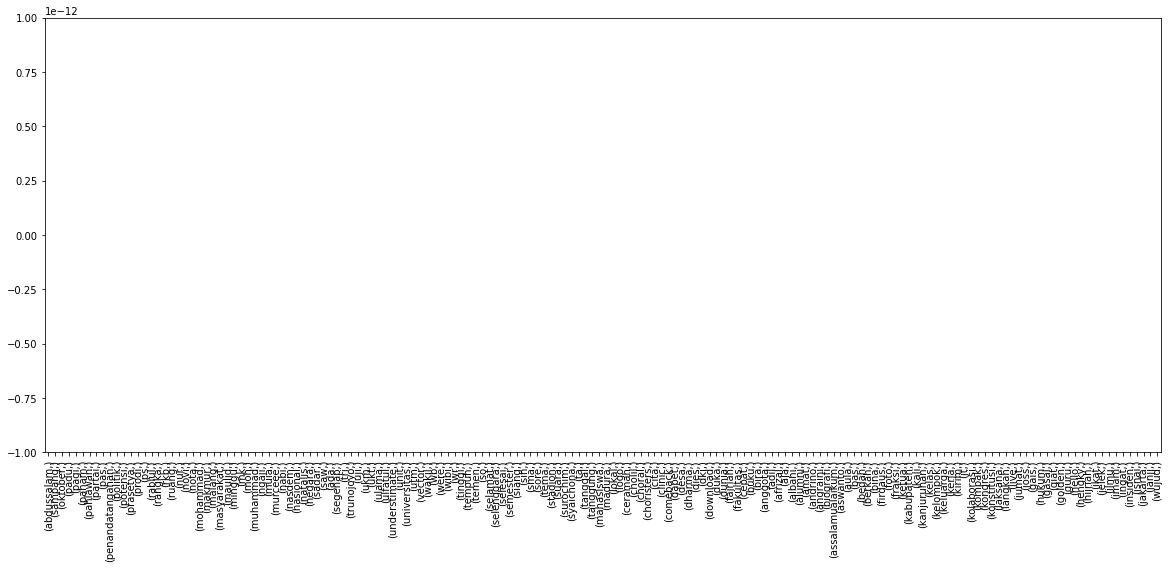

In [32]:
#let's plot the ordered mutual_info values per feature
mutual_info.sort_values(ascending=False).plot.bar(figsize=(20, 8))

In [33]:
from sklearn.feature_selection import SelectKBest
#No we Will select the  top 5 important features
sel_five_cols = SelectKBest(mutual_info_classif, k=100)
sel_five_cols.fit(X_train, y_train)
X_train.columns[sel_five_cols.get_support()]

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


Index([          ('jumat',),       ('kabupaten',),            ('kali',),
            ('kanjuruhan',),           ('kelas',),        ('kelompok',),
              ('keluarga',),           ('kerja',),           ('ketua',),
                 ('kirim',),      ('kolaborasi',),          ('kompak',),
               ('kongres',),      ('konstitusi',),         ('laksana',),
               ('langkah',),            ('live',),            ('logo',),
                 ('lokal',),          ('madura',),       ('mahasiswa',),
                ('makmur',),          ('malang',),      ('masyarakat',),
                ('maulid',),          ('minggu',),              ('mk',),
                   ('moh',),        ('mohammad',),        ('muhammad',),
                  ('muia',),         ('murceee',),            ('nabi',),
                ('nasdem',),        ('nasional',),         ('natalis',),
                ('negara',),           ('ngaji',),            ('nota',),
                  ('novi',),             ('nur',), 